# ***`15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.`***

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ***`a. For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.`***

In [ ]:
Boston_data = pd.read_csv("Boston.csv")
predictor_names = [i for i in Boston_data.iloc[:, 1: ]]
predictor_names = np.array(predictor_names)
response = Boston_data['CRIM']
model_info_list = np.array([]).reshape((0, 4))
for predictor_name in predictor_names:
  predictor = sm.add_constant(Boston_data[predictor_name])
  model = sm.OLS(response, predictor)
  model_info = model.fit()
  temp = [[predictor_name, model_info.params[0], model_info.params[1], model_info.pvalues[1]]]
  model_info_list = np.concatenate((model_info_list, temp))
print("***The result for fit simple linear regression models to predict the response:")
columns = ["Predictor name", "Beta 0", "Beta 1", "p-value"]
data = pd.DataFrame(data=model_info_list, columns=columns)
data

***The result for fit simple linear regression models to predict the response:


,Predictor name,Beta 0,Beta 1,p-value
0,ZN,4.453693755086386,-0.07393497740412348,5.506472107679059e-06
1,INDUS,-2.0637426063278257,0.5097763311042313,1.4503489330272292e-21
2,CHAS,3.7444468365180463,-1.8927765508037608,0.20943450153520068
3,NOX,-13.719882309974341,31.248531201122926,3.751739260356923e-23
4,RM,20.481804177792398,-2.6840512241139476,6.346702984687897e-07
5,AGE,-3.777906317968266,0.10778622713953308,2.8548693502441573e-16
6,DIS,9.49926164655728,-1.5509016824100994,8.519948766926204e-19
7,RAD,-2.2871594483103532,0.6179109273272013,2.6938443981858274e-56
8,TAX,-8.528369093069147,0.029742252822765353,2.357126835257249e-47
9,PTRATIO,-17.646933472448016,1.1519827870705865,2.942922447359688e-11


***- All of these predictors are statistically significant associations with the response except "CHAS" (p-value is quit high)***

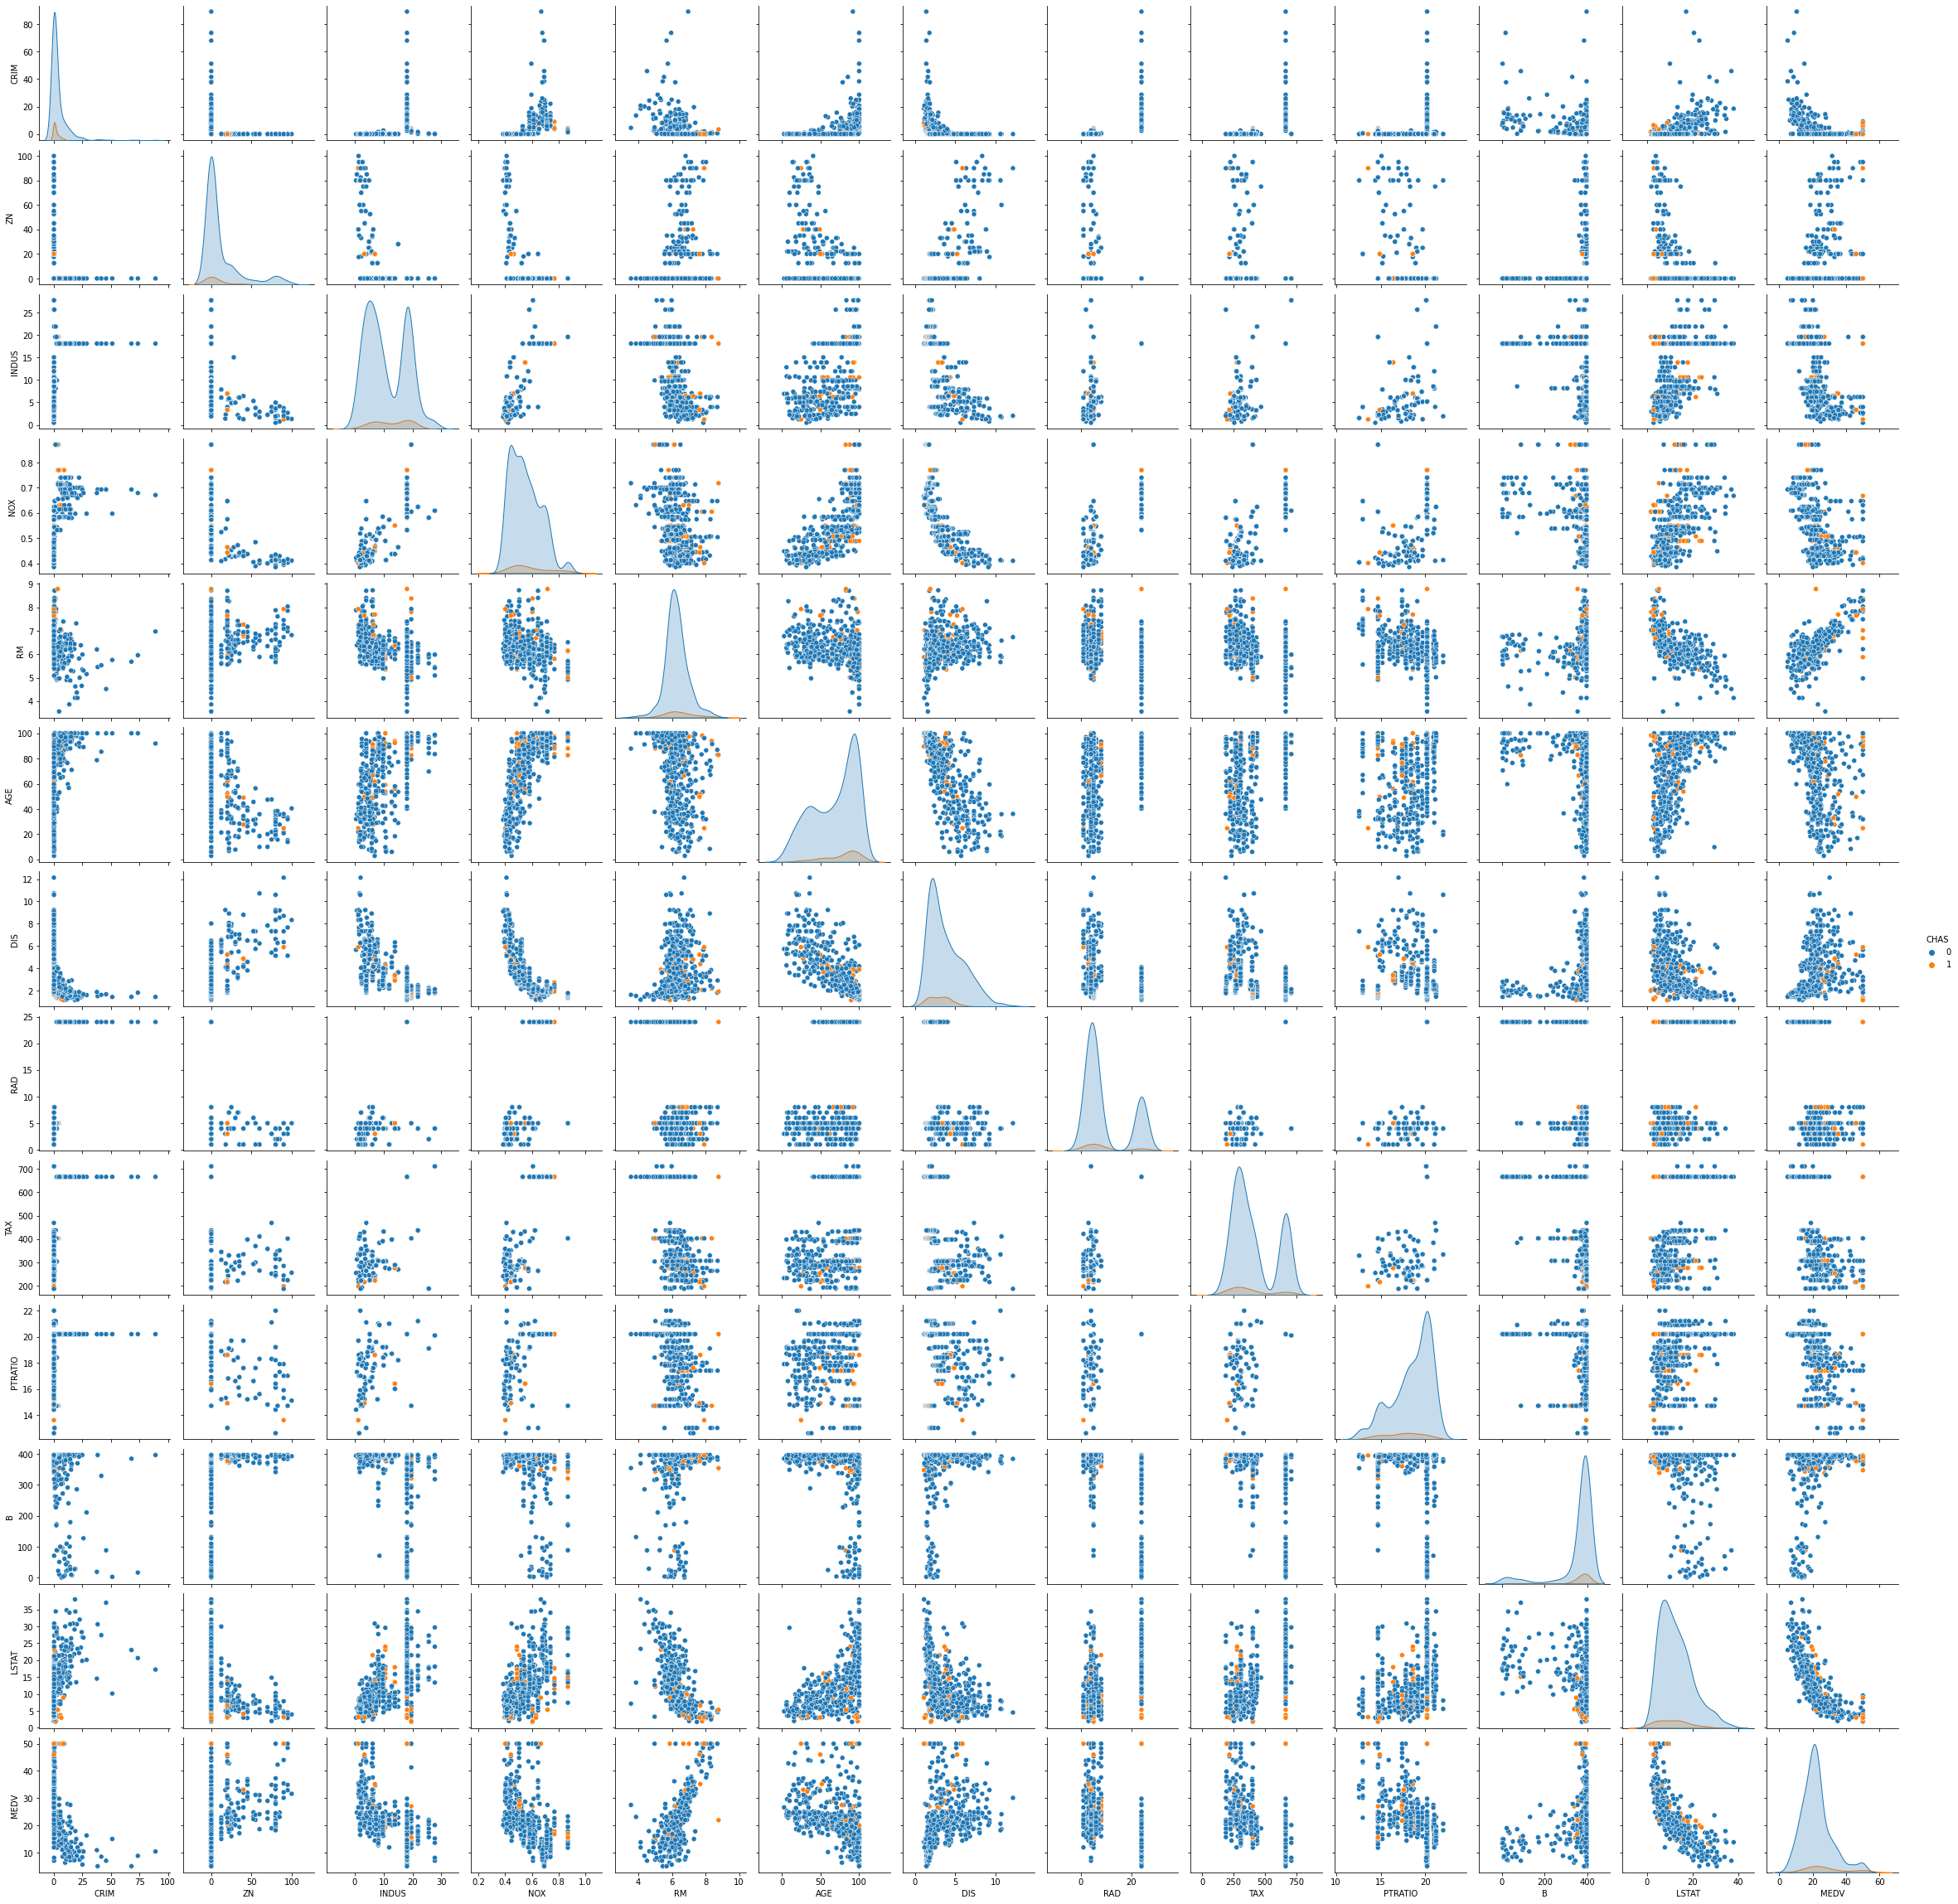

In [ ]:
# Create some plots to back up your assertions
sn.pairplot(Boston_data, hue="CHAS")


# ***`b. Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?`***

In [ ]:
predictors = sm.add_constant(Boston_data.iloc[:, 1:])
response = Boston_data['CRIM']
model = sm.OLS(response, predictors)
model_info = model.fit()
print(model_info.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.57e-56
Time:                        06:08:04   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

# ***`c. How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.`***

Text(0, 0.5, 'Multivariate Regression Coeffecients')

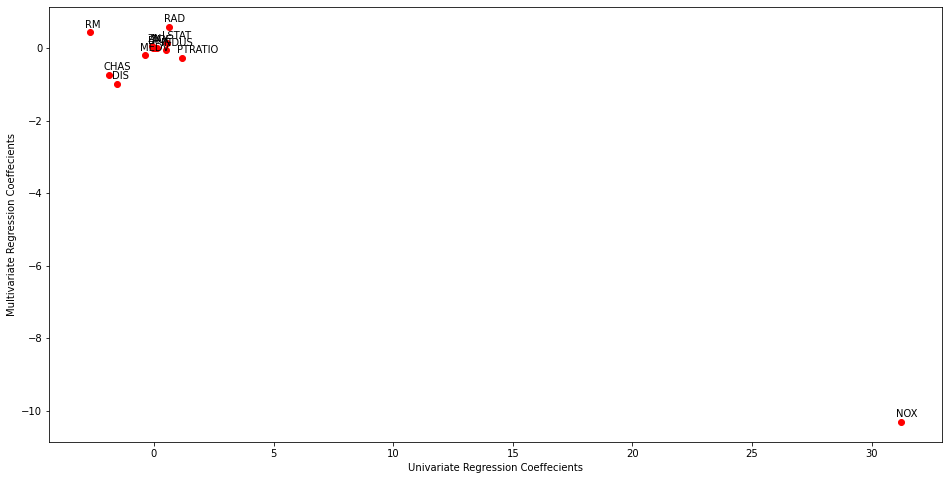

In [ ]:
mlr_coef = model_info.params[1:].to_numpy().astype(float)
ur_coef = data["Beta 1"].to_numpy().astype(float)
names = data["Predictor name"].to_numpy()
data1 = pd.DataFrame(data=mlr_coef, columns=["mlr_coef"])
data1.index = names
data1["ur_coef"] = ur_coef

fig,ax = plt.subplots(figsize = (16,8))
ax.scatter(ur_coef, mlr_coef, c = 'r')

for name, i, j in zip(names, ur_coef, mlr_coef):
  ax.annotate(name, xy = (i, j), xytext = (-5, 5), textcoords = 'offset points')

ax.set_xlabel('Univariate Regression Coeffecients')
ax.set_ylabel('Multivariate Regression Coeffecients')

# ***`d. Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form : Y = β0 + β1X + β2X2 + β3X3 + .`***

In [ ]:
column_names = np.array(Boston_data.columns[1:])
for column_name in column_names: 
  print("*********************************************") 
  print("---------------------------------------------")
  print("*********************************************")
  print("- Model Information with the predictor {} is:".format(column_name))
  forl = "CRIM ~ {x} + I({x}**2)+I({x}**3)".format(x = column_name)
  model_with_MEDV = smf.ols(formula=forl, data = Boston_data)
  model_with_MEDV_info = model_with_MEDV.fit()
  print(model_with_MEDV_info.summary())


*********************************************
---------------------------------------------
*********************************************
- Model Information with the predictor ZN is:
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.28e-06
Time:                        07:37:20   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    s

***`- Answer: There is evidence of non-linear associations between predictor and responses`***